# Text Data Pre-processing

Now that I have cleaned my dataset, I need to prepare the text before I Vectorize it into new features. Text data is clunky, containing punctuation, stopwords, variants on the same word. To increase the accuracy of my future models it helps to pre-process the text to remove all punctuation, stopwords and convert any word variants to their base form. This allows the model to focus on repetition of the same word across the text instead of getting hung up on apparent differences between similar words.

There a couple of packages available to help with this, in particular NLTK and SpaCy. The main difference between the two is that where NTLK has a number of different algorithms for each pre-processing step, SpaCy only has one, but the optimised one for the job. This will allow me to abstract out the necessity of fiddling with the various NLTK algorithms and speed up my project.

In [16]:
# Basic Packages
import numpy as np
import pandas as pd

# Import SpaCy Packages
import spacy
import en_core_web_sm

# Load the English module
sp = en_core_web_sm.load()

I will create various functions that will eventually be put together in one "cleaning" function that will be applied to all of the text data (headlines and body) in my dataset. 

The first function I will make will be my_tokenizer. This will simply break each sentence into separate tokens. 

To test the effectiveness of my functions I will use the same dummy sentence through out.

In [17]:
dummy_sentence = "It is a wonderful day today to go walking, isn't it?"

In [18]:
def my_tokenizer(text):
    tokens = sp(text)
    return tokens

In [19]:
tokenized_sentence = my_tokenizer(dummy_sentence)

In [20]:
for token in tokenized_sentence:
    print(token)

It
is
a
wonderful
day
today
to
go
walking
,
is
n't
it
?


My tokenizer works in breaking my sentence into separate tokens. It can be seen that it has split up the punctuation as well. 

An interesting question for my NLP project will be whether punctuation will be helpful in determining Fake or Real news. It could be possible that Fake news, for example, utilises exclamation marks to try and reiterate points. However, given the length of the articles and the number of punctuation marks I will remove the punctuation along with the stopwords.

Stopwords are "words that do not appear in the index in a particular database because they are either insignificant (i.e., articles, prepositions) or so common that the results would be higher than the system can handle" Ref(http://xpo6.com/list-of-english-stop-words/)

In [21]:
def my_stopword_punct_remover(tokens):
    cleaned_tokens = []

    for token in tokens:
        if ((token.is_stop) or (token.is_punct)):
            continue
        else:
            cleaned_tokens.append(token)
    return cleaned_tokens

In [22]:
stopword_sentence = my_stopword_punct_remover(tokenized_sentence)

In [23]:
print(stopword_sentence)

[wonderful, day, today, walking]


Notice that words such as "It", "is", "a", "to" and "go" have been removed from my tokenized data. The punctuation still remains however. 

The next stage in the pre-processing is to remove the variation of similar words. What I mean by this is that words such as walk, walked, walking all derive from the same word, walk. The variation provides us with syntax and tense bur for a machine it is more useful to have these be represented in the same way to enforce context and meaning.

There are two methods to do this, one is Stemming and the other is Lemmatization. The issue with Stemming is that the ouput may not be a recognizable word in English. Whereas Lemmatization will return familiar English words as output. This imporves interpretability once we start fitting our model and seeing which words or "features" help with our calssification. Due to this I will be using Lemmatization for my text data.

In [24]:
def my_lemmatizer(tokens):
    lemmatized_tokens = []
    
    for token in tokens:
        lemma = token.lemma_
        lemmatized_tokens.append(lemma)
    return lemmatized_tokens

In [25]:
lemmatized_sentence = my_lemmatizer(stopword_sentence)

In [26]:
print(lemmatized_sentence)

['wonderful', 'day', 'today', 'walk']


Here you can see the word "walking" has been truncated to walk as desired.

Now that I have defined all my pre-procesing functions. It is time to put it all together into one function that I can then apply to the two text columns in my dataset.

In [55]:
def my_pre_processer(column):
    processed_text = []
    i = 0
    for entry in column:
        tokens = my_tokenizer(entry)
        stopword_free_tokens = my_stopword_punct_remover(tokens)
        lemmatized_tokens = my_lemmatizer(stopword_free_tokens)
        processed_strings = ' '.join(lemmatized_tokens)        
        processed_text.append(processed_strings)
        i += 1
        if i % 100 == 0:
            print(i)
    return processed_text

In [56]:
df_fake_news = pd.read_csv('data/clean_fake_news.csv')

In [57]:
df_fake_news.isna().sum()

Unnamed: 0    0
Headline      0
Body          0
Label         0
dtype: int64

In [58]:
df_fake_news['Processed Body'] = my_pre_processer(df_fake_news['Body'])

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300


In [59]:
df_fake_news['Processed Headline'] = my_pre_processer(df_fake_news['Headline'])

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300


In [60]:
df_fake_news.drop('Unnamed: 0', axis=1, inplace=True)

In [61]:
df_fake_news = df_fake_news[['Headline', 'Processed Headline', 'Body', 'Processed Body', 'Label']]

In [62]:
# Check to see if we have lost any information during the pre-processing
df_fake_news.isna().sum()

Headline              0
Processed Headline    0
Body                  0
Processed Body        0
Label                 0
dtype: int64

In [63]:
df_fake_news

,Headline,Processed Headline,Body,Processed Body,Label
0,Four ways Bob Corker skewered Donald Trump,way Bob Corker skewer Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,image copyright Getty Images \n Sunday morning...,1
1,Linklater's war veteran comedy speaks to moder...,Linklater war veteran comedy speak modern Amer...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",LONDON Reuters flag Flying comedy drama Vietna...,1
2,Trump’s Fight With Corker Jeopardizes His Legi...,Trump ’s Fight Corker Jeopardizes legislative ...,The feud broke into public view last week when...,feud break public view week Mr. Corker say Mr....,1
3,Egypt's Cheiron wins tie-up with Pemex for Mex...,Egypt Cheiron win tie Pemex mexican onshore oi...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,MEXICO CITY Reuters Egypt ’s Cheiron Holdings ...,1
4,Jason Aldean opens 'SNL' with Vegas tribute,Jason Aldean open SNL Vegas tribute,"Country singer Jason Aldean, who was performin...",country singer Jason Aldean perform Las Vegas ...,1
...,...,...,...,...,...
10318,State Department says it can't find emails fro...,State Department say find email Clinton specia...,The State Department told the Republican Natio...,State Department tell Republican National Comm...,1
10319,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,p PBS stand plutocratic Pentagon,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,p PBS stand plutocratic Pentagon post Oct 27 2...,0
10320,Anti-Trump Protesters Are Tools of the Oligarc...,Anti trump Protesters tool Oligarchy info...,Anti-Trump Protesters Are Tools of the Oligar...,Anti trump Protesters tool Oligarchy reform...,0
10321,"In Ethiopia, Obama seeks progress on peace, se...",Ethiopia Obama seek progress peace security Ea...,"ADDIS ABABA, Ethiopia —President Obama convene...",ADDIS ABABA Ethiopia —President Obama convene ...,1


In [64]:
# Save and export this dataset
df_fake_news.to_csv('data/preprocessed_fake_news.csv', index=False)

## Exploring the new columns

### WordCloud of Fake News and Real News

In [25]:
fake_body_word_dict = {}
fake_headline_word_dict = {}
real_body_word_dict = {}
real_headline_word_dict = {}

df_fake = df_fake_news[df_fake_news['Label'] == 0]
df_real = df_fake_news[df_fake_news['Label'] == 1]

for entry in df_fake['Processed Body']:
    for word in entry.split(" "):
        if word in fake_body_word_dict:
            fake_body_word_dict[word] += 1
        else:
            fake_body_word_dict[word] = 1
    
for entry in df_fake['Processed Headline']:
    for word in entry.split(" "):
        if word in fake_headline_word_dict:
            fake_headline_word_dict[word] += 1
        else:
            fake_headline_word_dict[word] = 1
            
            
for entry in df_real['Processed Body']:
    for word in entry.split(" "):
        if word in real_body_word_dict:
            real_body_word_dict[word] += 1
        else:
            real_body_word_dict[word] = 1
    
for entry in df_real['Processed Headline']:
    for word in entry.split(" "):
        if word in real_headline_word_dict:
            real_headline_word_dict[word] += 1
        else:
            real_headline_word_dict[word] = 1

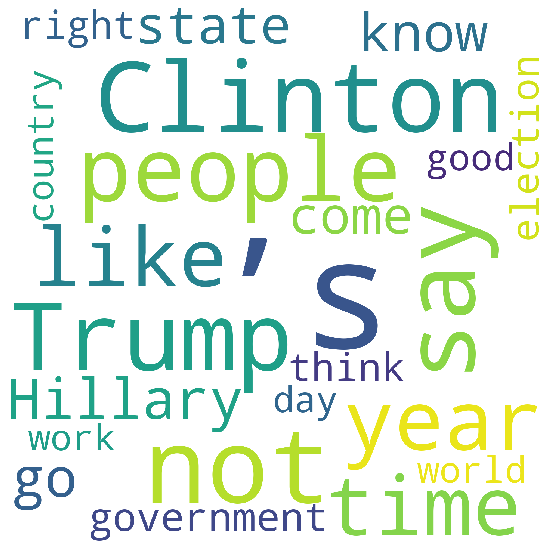

In [26]:
# https://stackoverflow.com/questions/43145199/create-wordcloud-from-dictionary-values
# https://github.com/amueller/word_cloud/commit/32b8026a40b2b041bd4a0cbd3ef502630c77271e
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud

plt.figure(figsize=(16,10))
fake_body_wc = WordCloud(background_color="white",width=2000,height=2000, max_words=25,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(fake_body_word_dict)
plt.axis('off')
plt.imshow(fake_body_wc)
fake_body_wc = fake_body_wc.to_file('images/fake_body_wc.png')

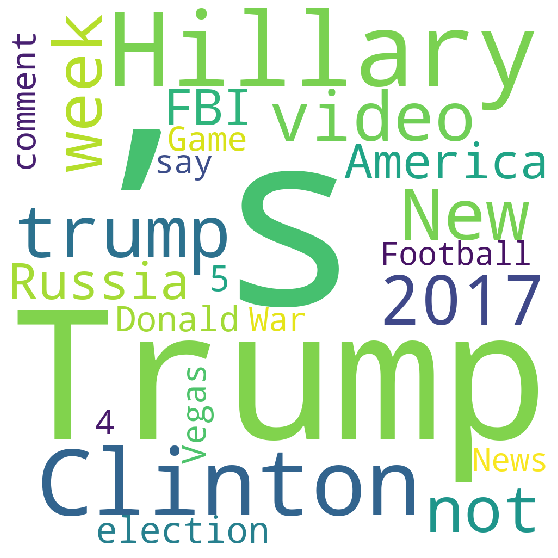

In [27]:
plt.figure(figsize=(16,10))
fake_headline_wc = WordCloud(background_color="white",width=1000,height=1000, max_words=25,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(fake_headline_word_dict)
plt.axis('off')
plt.imshow(fake_headline_wc)
fake_headline_wc = fake_headline_wc.to_file('images/fake_headline_wc.png')

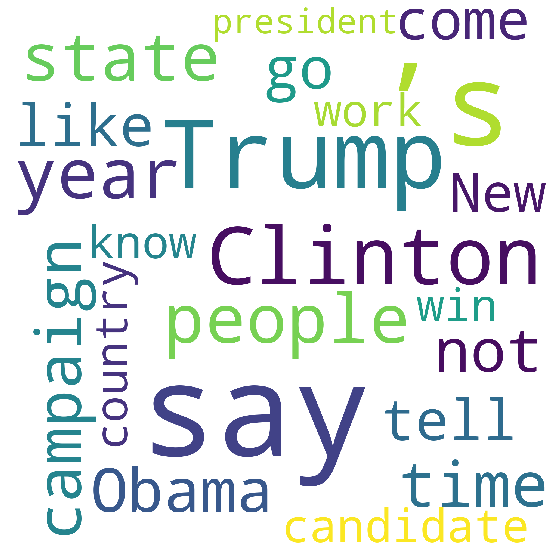

In [28]:
plt.figure(figsize=(16,10))
real_body_wc = WordCloud(background_color="white",width=2000,height=2000, max_words=25,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(real_body_word_dict)
plt.axis('off')
plt.imshow(real_body_wc)
real_body_wc = real_body_wc.to_file('images/real_body_wc.png')

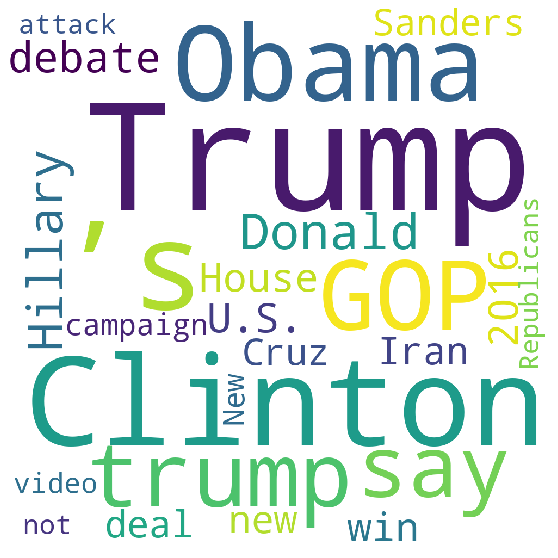

In [29]:
plt.figure(figsize=(16,10))
real_headline_wc = WordCloud(background_color="white",width=1000,height=1000, max_words=25,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(real_headline_word_dict)
plt.axis('off')
plt.imshow(real_headline_wc)
real_headline_wc = real_headline_wc.to_file('images/real_headline_wc.png')